## Import

In [1]:
from ipywidgets import *
from scipy.stats import zscore, pearsonr, kendalltau, spearmanr, ttest_rel, ttest_1samp, ttest_ind
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist, cdist
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

np.set_printoptions(suppress=True)

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = False
mpl.rcParams['axes.spines.left'] = True

def cos_sim(A, B):
    return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

/home/dasom/anaconda3/envs/p38/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


#### Encoding performance

In [ ]:
FIR_tot_novelty_ev = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/FIR_tot_novelty_ev.npy')
FIR_tot_memory_ev = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/FIR_tot_memory_ev.npy')
FIR_tot_recall_ev = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/FIR_tot_recall_start_ev.npy')

In [ ]:
novelty_co_space_novelty_true = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/novelty_co_space_novelty_true.npy')
novelty_co_space_novelty_perm = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/novelty_co_space_novelty_perm.npy')
novelty_val_space_novelty_true = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/novelty_val_space_novelty_true.npy')
novelty_val_space_novelty_perm = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/novelty_val_space_novelty_perm.npy')

novelty_co_space_memory_true = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/novelty_co_space_memory_true.npy')
novelty_co_space_memory_perm = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/novelty_co_space_memory_perm.npy')
novelty_val_space_memory_true = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/novelty_val_space_memory_true.npy')
novelty_val_space_memory_perm = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/novelty_val_space_memory_perm.npy')

memory_space_memory_true = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/memory_space_memory_true.npy')
memory_space_memory_perm = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/memory_space_memory_perm.npy')
memory_space_novelty_true = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/memory_space_novelty_true.npy')
memory_space_novelty_perm = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/memory_space_novelty_perm.npy')

recall_start_space_recall_true = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/retrieval_space_retrieval_true.npy')
recall_start_space_recall_perm = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/retrieval_space_retrieval_true.npy')
# recall_end_space_recall_true = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/retrieval_space_retrieval_true.npy')
# recall_end_space_recall_perm = np.load('/media/dasom/caee0336-77a9-438c-af2f-7cf5b88293e7/dasom/Neural_subspace/results/retrieval_space_retrieval_true.npy')

##### Linear arrangement

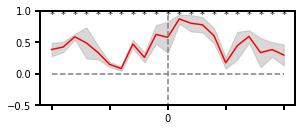

In [226]:
window_length = 21

# pc_90 = np.array([np.arange(np.sum(pc1_evs[r] < 0.8)+1).astype('int') for r in range(len(patterns))])
# pc_90[pc_90 < 3] = 3
pc_90 = [np.arange(12)] * 1
# pc_90 = [[1]] * len(patterns)

true_est_poses = []
r2_trues = []
r2_perms = []
pvalues = []
fig = plt.figure(figsize = [8,12])
for roi_num in range(1):
    fMRI_data_true = novelty_co_space_novelty_true[roi_num]
    fMRI_data_perm = novelty_co_space_novelty_perm[roi_num]

    # model_data = [-4,-3,-2,-1,0,1,2,3,4]
    model_data = [-1,-1,-1,0,0,0,1,1,1]  
    # model_data = [-1,0,1,-1,0,1,-1,0,1]  
    # model_data = [-5,-3,-1,1,3,5]

    axs = fig.add_subplot(7,2,roi_num+1)
    true_est_pos = []
    r2_true = []
    for t in range(window_length):
        distance_mat = cdist(fMRI_data_true[:,pc_90[roi_num],t], fMRI_data_true[:,pc_90[roi_num],t])
        len_from_p1 = []
        for c in range(fMRI_data_true.shape[0]):
            p1 = fMRI_data_true[np.where(distance_mat == np.max(distance_mat))[0][1],pc_90[roi_num],t]
            p2 = fMRI_data_true[np.where(distance_mat == np.max(distance_mat))[0][0],pc_90[roi_num],t] 
            p3 = fMRI_data_true[c,pc_90[roi_num],t] 

            unit_length = np.linalg.norm(p1-p2)
            l2 = np.sum((p1-p2)**2)
            a = np.sum((p3 - p1) * (p2 - p1)) / l2
            a = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
            projection = p1 + a * (p2 - p1)
            len_from_p1.append(np.linalg.norm(p1 - projection)/unit_length)
        r2_true.append(sm.OLS(len_from_p1, sm.add_constant(model_data)).fit().rsquared)
        true_est_pos.append(len_from_p1)
    true_est_poses.append(true_est_pos)

    r2_perm = []
    for repeat in range(len(fMRI_data_perm)):
        r2 = []
        for t in range(window_length):
            distance_mat = cdist(fMRI_data_perm[repeat][:,pc_90[roi_num],t], fMRI_data_perm[repeat][:,pc_90[roi_num],t])  
            len_from_p1 = []
            for c in range(fMRI_data_true.shape[0]):
                p1 = fMRI_data_perm[repeat][np.where(distance_mat == np.max(distance_mat))[0][1],pc_90[roi_num],t]
                p2 = fMRI_data_perm[repeat][np.where(distance_mat == np.max(distance_mat))[0][0],pc_90[roi_num],t] 
                p3 = fMRI_data_perm[repeat][c,pc_90[roi_num],t] 

                unit_length = np.linalg.norm(p1-p2)
                l2 = np.sum((p1-p2)**2)
                a = np.sum((p3 - p1) * (p2 - p1)) / l2
                a = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
                projection = p1 + a * (p2 - p1)
                len_from_p1.append(np.linalg.norm(p1 - projection)/unit_length)
            r2.append(sm.OLS(len_from_p1, sm.add_constant(model_data)).fit().rsquared)
        r2_perm.append(r2)

    r2_trues.append(r2_true)
    r2_perms.append(r2_perm)
    r2_true = np.array(r2_true)
    r2_perm = np.array(r2_perm)

    # axs.plot(r2_true, 'r')
    # axs.plot(np.mean(r2_perm, axis=0), 'grey')
    # errorh = np.array([np.std(r2_perm[:,t])*2 for t in range(window_length)])
    # axs.fill_between(np.arange(window_length), np.mean(r2_perm, axis=0)-errorh,np.mean(r2_perm, axis=0)+errorh, alpha = 0.3,color = 'grey')
    
    axs.plot(r2_true-np.mean(r2_perm, axis=0), 'r')
    errorh = np.array([np.std(r2_true[t] - r2_perm[:,t])*2 for t in range(window_length)])
    axs.fill_between(np.arange(window_length), r2_true-np.mean(r2_perm, axis=0)-errorh,r2_true-np.mean(r2_perm, axis=0)+errorh, alpha = 0.3,color = 'grey')
    
    axs.set_ylim([-0.5,1])
    axs.hlines(0, 0, window_length-1, linestyle = '--', color = 'grey')
    axs.vlines(10, -1, 1, linestyle = '--', color = 'grey')
    axs.set_xticks([0,5,10,15,20])
    axs.set_xticklabels(['','',0,'',''])
    pvalues.append([np.sum(r2_perm[:,t] > r2_true[t])/repetition for t in range(window_length)])
    for t in range(21):
        if np.sum(r2_perm[:,t] > r2_true[t])/repetition < .05:
            plt.text(t-0.2,0.9,'*')
r2_trues = np.array(r2_trues)
r2_perms = np.array(r2_perms)
fig.tight_layout()
# fig.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Valence_space_cooccur_r2.png', dpi=300, bbox_inches = "tight")

In [228]:
before = np.mean(r2_trues[:,:10], axis=1) - np.mean(r2_perms[:,:,:10], axis=2).T
after = np.mean(r2_trues[:,11:], axis=1) - np.mean(r2_perms[:,:,11:], axis=2).T
# Memory_space_cooccur_before = np.hstack([np.mean(r2_trues[:,:10]), np.mean(r2_perms[0,:,:10], axis=1)])
# Memory_space_cooccur_after = np.hstack([np.mean(r2_trues[:,11:]), np.mean(r2_perms[0,:,11:], axis=1)])

# before = np.mean(r2_trues[:,:10], axis=1) - np.mean(r2_perms[:,:,:10], axis=2).T
# after = np.mean(r2_trues[:,11:], axis=1) - np.mean(r2_perms[:,:,11:], axis=2).T
# Memory_space_valence_before = np.hstack([np.mean(r2_trues[:,:10]), np.mean(r2_perms[0,:,:10], axis=1)])
# Memory_space_valence_after = np.hstack([np.mean(r2_trues[:,11:]), np.mean(r2_perms[0,:,11:], axis=1)])

In [ ]:
plt.figure(figsize = [4,5])
bar1 = plt.bar([0], [np.mean(before)], color = 'navy', edgecolor = 'k', linewidth = 3, width = 0.7, alpha = 0.5) # #FF0000 #9C27B0 #656B83
plt.bar([1], [np.mean(after)], color = 'navy', edgecolor = 'k', linewidth = 3, width = 0.7) # #FF0000 #9C27B0 navy
# plt.errorbar([0,1], [np.mean(before), np.mean(after)], [np.std(before)*2, np.std(after)*2], linestyle = '', color = 'k', linewidth = 3)
plt.scatter(np.random.normal(size = 1000)/15, before, color = 'grey', alpha = 0.1)
plt.scatter(np.random.normal(size = 1000)/15 + 1 , after, color = 'grey', alpha = 0.1)
plt.xlim([-0.6, 1.6])
plt.ylim([0,0.8])
plt.xticks([0,1])
plt.yticks([0,0.4,0.8])
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Memory_summary.png', dpi=300, bbox_inches = "tight")

In [ ]:
# corr_look = np.array([zscore(Memory_space_cooccur_before)[0], zscore(Memory_space_valence_before)[0],
#                       zscore(Memory_space_cooccur_after)[0], zscore(Memory_space_valence_after)[0]])
# random_look = np.array([zscore(Memory_space_cooccur_before)[1:], zscore(Memory_space_valence_before)[1:],
#                         zscore(Memory_space_cooccur_after)[1:], zscore(Memory_space_valence_after)[1:]])

corr_look = np.array([Memory_space_cooccur_before[0], Memory_space_valence_before[0],  
                      Memory_space_cooccur_after[0], Memory_space_valence_after[0]])
random_look = np.array([Memory_space_cooccur_before[1:], Memory_space_valence_before[1:],
                        Memory_space_cooccur_after[1:], Memory_space_valence_after[1:]])
diff = np.array([corr_look]).T - random_look

x_pos = [0,0.4,1,1.4]
plt.figure(figsize = [6.5,4])
plt.xticks(x_pos, fontsize = 12)
plt.yticks([-0.1,0,0.1,0.2,0.3,0.4], fontsize = 12)
plt.xlim([-0.4,1.8])
plt.hlines([0],-1,5, 'black', linewidth = 1, linestyle = '--')

barlist = plt.bar(x_pos, np.mean(diff, axis=1), width = 0.3, edgecolor = 'k', alpha = 1)
barlist[0].set_facecolor('#FF0000')
barlist[0].set_alpha(0.5)
barlist[1].set_facecolor('#9C27B0')
barlist[1].set_alpha(0.5)
barlist[2].set_facecolor('#FF0000')
barlist[3].set_facecolor('#9C27B0')
plt.errorbar(x_pos, np.mean(diff, axis=1), np.std(diff, axis=1), linestyle = '', color = 'k')

# plt.scatter(x_pos[0], corr_look[0], color = 'red', marker = 'D', zorder = 2, linewidth = 3, alpha = 1)
# plt.scatter(x_pos[1], corr_look[2], color = 'red', marker = 'D', zorder = 2, linewidth = 3, alpha = 1)
# plt.scatter(x_pos[2], corr_look[1], color = '#9C27B0', marker = 'D', zorder = 2, linewidth = 3, alpha = 1)
# plt.scatter(x_pos[3], corr_look[3], color = '#9C27B0', marker = 'D', zorder = 2, linewidth = 3, alpha = 1)

# violin_parts = plt.violinplot(random_look.T, x_pos, showmeans=False, showmedians=False, showextrema=False, widths = 0.25)
# count = 0
# for vp in violin_parts['bodies']:
#     if count in [0,1]:
#         vp.set_facecolor('#2D639E')
#     else:
#         vp.set_facecolor('#2D639E') #8190B5
#     vp.set_alpha(0.5)
#     count += 1

plt.ylim([-0.1, 0.4])
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Memory_space_novelty_encoding2.png',dpi=300, bbox_inches = "tight")

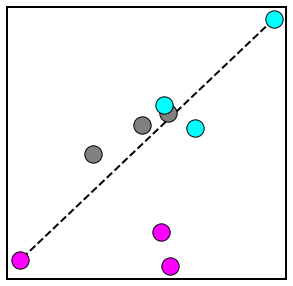

In [247]:
tp = 14
which = novelty_val_space_novelty_true

fig = plt.figure(figsize = [5,5])

# fig.gca().set_prop_cycle(plt.cycler('color', plt.cm.RdYlBu_r(np.linspace(0, 1, 9))))

# plt.scatter(which[0][[0,1,2],0,tp], which[0][[0,1,2],2,tp], marker = 'o', color = 'red', s = 300, edgecolor = 'k')
# plt.scatter(which[0][[3,4,5],0,tp], which[0][[3,4,5],2,tp], marker = 'o', color = 'grey', s = 300, edgecolor = 'k')
# plt.scatter(which[0][[6,7,8],0,tp], which[0][[6,7,8],2,tp], marker = 'o', color = 'blue', s = 300, edgecolor = 'k')

plt.scatter(which[0][[0,3,6],0,tp], which[0][[0,3,6],2,tp], marker = 'o', color = 'magenta', s = 300, edgecolor = 'k')
plt.scatter(which[0][[1,4,7],0,tp], which[0][[1,4,7],2,tp], marker = 'o', color = 'grey', s = 300, edgecolor = 'k')
plt.scatter(which[0][[2,5,8],0,tp], which[0][[2,5,8],2,tp], marker = 'o', color = 'cyan', s = 300, edgecolor = 'k')

# for c in range(9):
#     plt.scatter(which[0][c,0,tp], which[0][c,2,tp], marker = 'o',linewidths = 5)

plt.xticks([])
plt.yticks([])
plt.plot([which[0][2,0,tp], which[0][6,0,tp]], [which[0][2,2,tp], which[0][6,2,tp]], color = 'k', zorder = 0, linewidth = 2, linestyle = '--')
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Valence_space_valence_example.png', dpi=300, bbox_inches = "tight")

In [ ]:
t = 10
roi_num = 0
fMRI_data_true = p_c1_trues[roi_num]
distance_mat = cdist(fMRI_data_true[:,[0,1,2],t], fMRI_data_true[:,[0,1,2],t])
len_from_p1 = []
for c in range(fMRI_data_true.shape[0]):
    p1 = fMRI_data_true[np.where(distance_mat == np.max(distance_mat))[0][1],[0,1,2],t]
    p2 = fMRI_data_true[np.where(distance_mat == np.max(distance_mat))[0][0],[0,1,2],t] 
    p3 = fMRI_data_true[c,[0,1,2],t] 

    unit_length = np.linalg.norm(p1-p2)
    l2 = np.sum((p1-p2)**2)
    a = np.sum((p3 - p1) * (p2 - p1)) / l2
    a = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
    projection = p1 + a * (p2 - p1)
    len_from_p1.append(np.linalg.norm(p1 - projection)/unit_length)

fig = plt.figure()
fig.gca().set_prop_cycle(plt.cycler('color', plt.cm.RdYlBu_r(np.linspace(0, 1, 9))))
for p in range(9):
    plt.scatter([0],len_from_p1[p],zorder=2,linewidths=3)
plt.vlines(0,0,1,'grey',zorder=1)
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Cooccur_vs_valence_v3/a1.png', dpi=300, bbox_inches = "tight")

In [261]:
cumulative = False
r2_trues = []
r2_perms = []
pvalues = []
for num in range(1,13):
# for num in [2]:
    fMRI_data_true = novelty_co_space_novelty_true[0]
    fMRI_data_perm = novelty_co_space_novelty_perm[0]
    # model_data = [-1,-1,-1,0,0,0,1,1,1]  
    model_data = [-1,0,1,-1,0,1,-1,0,1] 
    # model_data = [-4,-3,-2,-1,0,1,2,3,4]

    if cumulative:
        r2_true = []
        for t in range(window_length):
            distance_mat = cdist(fMRI_data_true[:,:num,t], fMRI_data_true[:,:num,t])
            len_from_p1 = []
            for c in range(fMRI_data_true.shape[0]):
                p1 = fMRI_data_true[np.where(distance_mat == np.max(distance_mat))[0][1],:num,t]
                p2 = fMRI_data_true[np.where(distance_mat == np.max(distance_mat))[0][0],:num,t] 
                p3 = fMRI_data_true[c,:num,t] 

                unit_length = np.linalg.norm(p1-p2)
                l2 = np.sum((p1-p2)**2)
                a = np.sum((p3 - p1) * (p2 - p1)) / l2
                a = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
                projection = p1 + a * (p2 - p1)
                len_from_p1.append(np.linalg.norm(p1 - projection)/unit_length)
            r2_true.append(sm.OLS(len_from_p1, sm.add_constant(model_data)).fit().rsquared)

        r2_perm = []
        for repeat in range(repetition):
            r2 = []
            for t in range(window_length):
                distance_mat = cdist(fMRI_data_perm[repeat][:,:num,t], fMRI_data_perm[repeat][:,:num,t])  
                len_from_p1 = []
                for c in range(fMRI_data_true.shape[0]):
                    p1 = fMRI_data_perm[repeat][np.where(distance_mat == np.max(distance_mat))[0][1],:num,t]
                    p2 = fMRI_data_perm[repeat][np.where(distance_mat == np.max(distance_mat))[0][0],:num,t] 
                    p3 = fMRI_data_perm[repeat][c,:num,t] 

                    unit_length = np.linalg.norm(p1-p2)
                    l2 = np.sum((p1-p2)**2)
                    a = np.sum((p3 - p1) * (p2 - p1)) / l2
                    a = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
                    projection = p1 + a * (p2 - p1)
                    len_from_p1.append(np.linalg.norm(p1 - projection)/unit_length)
                r2.append(sm.OLS(len_from_p1, sm.add_constant(model_data)).fit().rsquared)
            r2_perm.append(r2)
    else:
        r2_true = []
        for t in range(window_length):
            distance_mat = cdist(fMRI_data_true[:,[num-1],t], fMRI_data_true[:,[num-1],t])
            len_from_p1 = []
            for c in range(fMRI_data_true.shape[0]):
                p1 = fMRI_data_true[np.where(distance_mat == np.max(distance_mat))[0][1],[num-1],t]
                p2 = fMRI_data_true[np.where(distance_mat == np.max(distance_mat))[0][0],[num-1],t] 
                p3 = fMRI_data_true[c,[num-1],t] 

                unit_length = np.linalg.norm(p1-p2)
                l2 = np.sum((p1-p2)**2)
                a = np.sum((p3 - p1) * (p2 - p1)) / l2
                a = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
                projection = p1 + a * (p2 - p1)
                len_from_p1.append(np.linalg.norm(p1 - projection)/unit_length)
            r2_true.append(sm.OLS(len_from_p1, sm.add_constant(model_data)).fit().rsquared)

        r2_perm = []
        for repeat in range(repetition):
            r2 = []
            for t in range(window_length):
                distance_mat = cdist(fMRI_data_perm[repeat][:,[num-1],t], fMRI_data_perm[repeat][:,[num-1],t])  
                len_from_p1 = []
                for c in range(fMRI_data_true.shape[0]):
                    p1 = fMRI_data_perm[repeat][np.where(distance_mat == np.max(distance_mat))[0][1],[num-1],t]
                    p2 = fMRI_data_perm[repeat][np.where(distance_mat == np.max(distance_mat))[0][0],[num-1],t] 
                    p3 = fMRI_data_perm[repeat][c,[num-1],t] 

                    unit_length = np.linalg.norm(p1-p2)
                    l2 = np.sum((p1-p2)**2)
                    a = np.sum((p3 - p1) * (p2 - p1)) / l2
                    a = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
                    projection = p1 + a * (p2 - p1)
                    len_from_p1.append(np.linalg.norm(p1 - projection)/unit_length)
                r2.append(sm.OLS(len_from_p1, sm.add_constant(model_data)).fit().rsquared)
            r2_perm.append(r2)

    r2_trues.append(r2_true)
    r2_perms.append(r2_perm)
    r2_true = np.array(r2_true)
    r2_perm = np.array(r2_perm)
r2_trues = np.array(r2_trues)
r2_perms = np.array(r2_perms)

In [262]:
before = np.mean(r2_trues[:,:10], axis=1) - np.mean(r2_perms[:,:,:10], axis=2).T
after = np.mean(r2_trues[:,11:], axis=1) - np.mean(r2_perms[:,:,11:], axis=2).T

# before_cooccur_cooccur = before
# after_cooccur_cooccur = after

# before_cooccur_valence = before
# after_cooccur_valence = after

# before_valence_cooccur = before
# after_valence_cooccur = after

# before_valence_valence = before
# after_valence_valence = after

# before_cooccur_cooccur_each = before
# after_cooccur_cooccur_each = after

# before_cooccur_valence_each = before
# after_cooccur_valence_each = after

# before_valence_valence_each = before
# after_valence_valence_each = after

before_valence_cooccur_each = before
after_valence_cooccur_each = after

# before_cooccur_memory_each = before
# after_cooccur_memory_each = after

# before_valence_memory_each = before
# after_valence_memory_each = after

In [ ]:
print(np.mean(before_cooccur_valence_each, axis=0), 
      [np.sum(before_cooccur_valence_each[:,i] < 0)/repetition for i in range(12)])
print(np.mean(after_cooccur_valence_each, axis=0), 
      [np.sum(after_cooccur_valence_each[:,i] < 0)/repetition for i in range(12)])

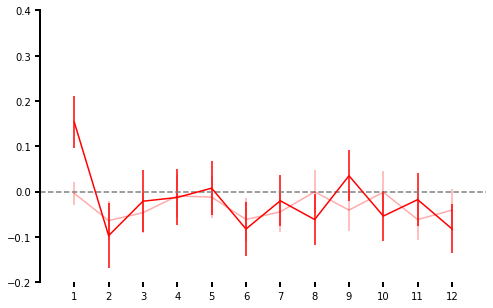

In [266]:
plt.figure(figsize = [8,5])
# plt.errorbar(np.arange(len(before_cooccur_valence.T)), np.mean(before_cooccur_valence, axis=0), np.std(before_cooccur_valence, axis=0), color = 'm', alpha = 0.33)
# plt.errorbar(np.arange(len(after_cooccur_valence.T)), np.mean(after_cooccur_valence, axis=0), np.std(after_cooccur_valence, axis=0), color = 'm')
# plt.errorbar(np.arange(len(before_cooccur_cooccur.T)), np.mean(before_cooccur_cooccur, axis=0), np.std(before_cooccur_cooccur, axis=0), color = 'r', alpha = 0.33)
# plt.errorbar(np.arange(len(after_cooccur_cooccur.T)), np.mean(after_cooccur_cooccur, axis=0), np.std(after_cooccur_cooccur, axis=0), color = 'r')

# plt.errorbar(np.arange(12), np.mean(before_valence_cooccur_each, axis=0), np.std(before_valence_cooccur_each, axis=0), color = 'm', alpha = 0.33)
# plt.errorbar(np.arange(12), np.mean(after_valence_cooccur_each, axis=0), np.std(after_valence_cooccur_each, axis=0), color = 'm')
plt.errorbar(np.arange(12), np.mean(before_cooccur_valence_each, axis=0), np.std(before_cooccur_valence_each, axis=0), color = 'r', alpha = 0.33)
plt.errorbar(np.arange(12), np.mean(after_cooccur_valence_each, axis=0), np.std(after_cooccur_valence_each, axis=0), color = 'r')

plt.xticks(np.arange(12),np.arange(1,13))
plt.xlim([-1,12])    
plt.ylim([-0.2,0.4])
# plt.ylim([-0.1,0.6])
plt.hlines(0,-1,20, color = 'grey', linestyle = '--')
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Encoding_performance_valence_space_cooccur_each_pc.png', dpi=300, bbox_inches = "tight")

In [ ]:
befores = np.array([before_cooccur_cooccur_each, before_cooccur_valence_each, before_valence_cooccur_each, before_valence_valence_each])
afters = np.array([after_cooccur_cooccur_each, after_cooccur_valence_each, after_valence_cooccur_each, after_valence_valence_each])

plt_data = afters[:,:,0]

x_pos = [0,0.4,1,1.4]
plt.figure(figsize = [6,4])
plt.hlines([0],-1,5, 'black', linewidth = 1, linestyle = '--')

# barlist = plt.bar(x_pos, np.mean(plt_data, axis=1), width = 0.3, edgecolor = 'k', alpha = 0.5)
barlist = plt.bar(x_pos, np.mean(plt_data, axis=1), width = 0.3, edgecolor = 'k')
barlist[0].set_facecolor('#FF0000')
barlist[1].set_facecolor('#FF0000')
barlist[1].set_hatch('//')
barlist[2].set_facecolor('#9C27B0')
barlist[2].set_hatch('//')
barlist[3].set_facecolor('#9C27B0')
# plt.errorbar(x_pos, np.mean(plt_data, axis=1), np.std(plt_data, axis=1), linestyle = '', color = 'k')
for c in range(4):
    plt.scatter(np.random.normal(size=1000)/60 + x_pos[c], plt_data[c], color = 'gray', alpha = 0.2)

plt.xticks(x_pos, fontsize = 12)
plt.yticks([-0.2,0,0.2,0.4], fontsize = 12)
plt.xlim([-0.4,1.8])
plt.ylim([-0.2, 0.4])
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Figure3b_after.png',dpi=300, bbox_inches = "tight")

In [ ]:
data = np.array([before_cooccur_memory_each, before_valence_memory_each, after_cooccur_memory_each, after_valence_memory_each])

plt_data = data[:,:,0]

x_pos = [0,0.4,1,1.4]
plt.figure(figsize = [6,4])
plt.hlines([0],-1,5, 'black', linewidth = 1, linestyle = '--')

barlist = plt.bar(x_pos, np.mean(plt_data, axis=1), width = 0.3, edgecolor = 'k')
barlist[0].set_facecolor('#FF0000')
barlist[0].set_alpha(0.5)
barlist[1].set_facecolor('#9C27B0')
barlist[1].set_alpha(0.5)
barlist[2].set_facecolor('#FF0000')
barlist[3].set_facecolor('#9C27B0')

for c in range(4):
    plt.scatter(np.random.normal(size=1000)/60 + x_pos[c], plt_data[c], color = 'gray', alpha = 0.2)

plt.xticks(x_pos, fontsize = 12)
plt.yticks([-0.3,0,0.3,0.6], fontsize = 12)
plt.xlim([-0.4,1.8])
plt.ylim([-0.3, 0.6])
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Figure4c.png',dpi=300, bbox_inches = "tight")

##### Inverse alignment

In [138]:
true1 = []
perm1 = []
true2 = []
perm2 = []
true3 = []
perm3 = []
for t in range(21):
    # true1.append(cos_sim(zscore(memory_space_memory_true[0][:,1,t]), zscore(novelty_co_space_novelty_true[0][:,0,t])))
    # perm1.append(np.array([cos_sim(zscore(memory_space_memory_perm[0][r][:,1,t]), zscore(novelty_co_space_novelty_perm[0][r][:,0,t])) for r in range(1000)]))
    # true2.append(cos_sim(zscore(memory_space_memory_true[0][:,1,t]), zscore(novelty_val_space_novelty_true[0][:,0,t])))
    # perm2.append(np.array([cos_sim(zscore(memory_space_memory_perm[0][r][:,1,t]), zscore(novelty_val_space_novelty_perm[0][r][:,0,t])) for r in range(1000)]))
    # true1.append(cos_sim(memory_space_memory_true[0][:,1,t], novelty_co_space_novelty_true[0][:,0,t]))
    # perm1.append(np.array([cos_sim(memory_space_memory_perm[0][r][:,1,t], novelty_co_space_novelty_perm[0][r][:,0,t]) for r in range(1000)]))
    # true2.append(cos_sim(memory_space_memory_true[0][:,1,t], novelty_val_space_novelty_true[0][:,0,t]))
    # perm2.append(np.array([cos_sim(memory_space_memory_perm[0][r][:,1,t], novelty_val_space_novelty_perm[0][r][:,0,t]) for r in range(1000)]))

    true_comem = spearmanr(memory_space_memory_true[0][:,1,t], novelty_co_space_novelty_true[0][:,0,t])[0]
    true_valmem = spearmanr(memory_space_memory_true[0][:,1,t], novelty_val_space_novelty_true[0][:,0,t])[0]
    perm_comem = np.array([spearmanr(memory_space_memory_perm[0][r][:,1,t], novelty_co_space_novelty_perm[0][r][:,0,t])[0] for r in range(1000)])
    perm_valmem = np.array([spearmanr(memory_space_memory_perm[0][r][:,1,t], novelty_val_space_novelty_perm[0][r][:,0,t])[0] for r in range(1000)])
    true1.append(true_comem)
    perm1.append(perm_comem)
    true2.append(true_valmem)
    perm2.append(perm_valmem)
    true3.append(true_comem + true_valmem)
    perm3.append(perm_comem + perm_valmem)
true1 = np.array(true1)
perm1 = np.array(perm1)
true2 = np.array(true2)
perm2 = np.array(perm2)
true3 = np.array(true3)
perm3 = np.array(perm3)
print([np.sum(true1[t] < perm1[t])/1000 for t in range(21)])
print([np.sum(true2[t] < perm2[t])/1000 for t in range(21)])
print([np.sum(true3[t] < perm3[t])/1000 for t in range(21)])

[0.258, 0.071, 0.374, 0.508, 0.46, 0.534, 0.971, 0.525, 0.254, 0.422, 0.978, 0.658, 0.457, 0.062, 0.01, 0.076, 0.117, 0.235, 0.365, 0.973, 0.605]
[0.707, 0.454, 0.545, 0.354, 0.234, 0.188, 0.979, 0.768, 0.788, 0.661, 0.985, 0.845, 0.309, 0.024, 0.087, 0.213, 0.204, 0.518, 0.382, 0.88, 0.737]
[0.5, 0.09, 0.451, 0.354, 0.21, 0.2, 0.991, 0.777, 0.611, 0.66, 0.995, 0.892, 0.278, 0.014, 0.008, 0.057, 0.065, 0.259, 0.279, 0.974, 0.819]


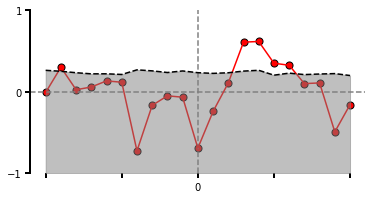

In [164]:
plt.figure(figsize = [6,3])
true = true3/2
# true_co = np.array([cos_sim(memory_space_memory_true[0][:,1,t], novelty_co_space_novelty_true[0][:,0,t]) for t in range(window_length)])
# true_co = np.array([spearmanr(memory_space_memory_true[0][:,1,t], novelty_co_space_novelty_true[0][:,0,t])[0] for t in range(window_length)])
error = np.std(perm3/2, axis=1)
plt.scatter(np.arange(21), true, s = 50, color = 'red', edgecolor = 'k', zorder = 1)
plt.plot(true,'red',zorder=2)
plt.fill_between(np.arange(21), -1, +error, alpha = 0.5,color = 'grey',zorder=2)
plt.plot(error,'k--',zorder=2)

plt.xlim([-1,21])
plt.ylim([-1,1])
plt.xticks([0,5,10,15,20],['','',0,'',''])
plt.yticks([-1,0,1])    
plt.vlines(10,-1,1,'grey','--',zorder=1)
plt.hlines(0,-1,21,'grey','--',zorder=1)
plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Alignment_axis2.png', dpi=300, bbox_inches = "tight")

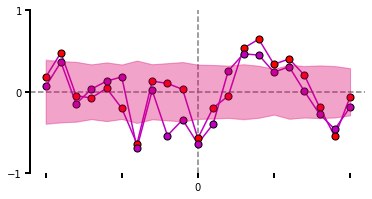

In [131]:
plt.figure(figsize = [6,3])
true_co = np.array([cos_sim(zscore(memory_space_memory_true[0][:,1,t]), zscore(novelty_co_space_novelty_true[0][:,0,t])) for t in range(window_length)])
# true_co = np.array([cos_sim(memory_space_memory_true[0][:,1,t], novelty_co_space_novelty_true[0][:,0,t]) for t in range(window_length)])
# true_co = np.array([spearmanr(memory_space_memory_true[0][:,1,t], novelty_co_space_novelty_true[0][:,0,t])[0] for t in range(window_length)])
error_co = np.array([np.std(perm1[t]) for t in range(window_length)])
plt.scatter(np.arange(21), true_co, s = 50, color = 'r', edgecolor = 'k', zorder = 3)
plt.plot(true_co,'m',zorder=2)
plt.fill_between(np.arange(window_length), -error_co, +error_co, alpha = 0.2,color = 'r',zorder=4)

true_val = np.array([cos_sim(zscore(memory_space_memory_true[0][:,1,t]), zscore(novelty_val_space_novelty_true[0][:,0,t])) for t in range(window_length)])
# true_val = np.array([cos_sim(memory_space_memory_true[0][:,1,t], novelty_val_space_novelty_true[0][:,0,t]) for t in range(window_length)])
# true_val = np.array([spearmanr(memory_space_memory_true[0][:,1,t], novelty_val_space_novelty_true[0][:,0,t])[0] for t in range(window_length)])
error_val = np.array([np.std(perm2[t]) for t in range(window_length)])
plt.scatter(np.arange(21), true_val, s = 50, color = 'm', edgecolor = 'k', zorder = 3)
plt.plot(true_val,'m',zorder=2)
plt.fill_between(np.arange(window_length), -error_val, +error_val, alpha = 0.2,color = 'm',zorder=4)

plt.xlim([-1,21])
plt.ylim([-1,1])
plt.xticks([0,5,10,15,20],['','',0,'',''])
plt.yticks([-1,0,1])    
plt.vlines(10,-1,1,'grey','--',zorder=1)
plt.hlines(0,-1,21,'grey','--',zorder=1)
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Alignment_axis1.png', dpi=300, bbox_inches = "tight")

(-0.5, 1.5)

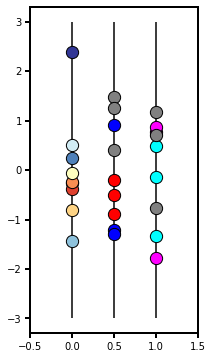

In [201]:
timepoint = 12

fig = plt.figure(figsize = [3,6])
fig.gca().set_prop_cycle(plt.cycler('color', plt.cm.RdYlBu(np.linspace(0, 1, 9))))
for p in range(9):
    plt.scatter([0],zscore(memory_space_memory_true[0][:,1,timepoint])[p],zorder=2,s=150,edgecolor='k')
plt.vlines(0,-3,3,'k',zorder=1)
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Cooccur_vs_valence_v3/a1.png', dpi=300, bbox_inches = "tight")

colors = [[0,0,1],[0,0,1],[0,0,1],
          [0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5],
          [1,0,0],[1,0,0],[1,0,0]]
for p in range(9):
    plt.scatter([0.5], zscore(novelty_co_space_novelty_true[0][:,0,timepoint])[p], color = colors[p], zorder=2,s=150,edgecolor='k')
plt.vlines(0.5,-3,3,'k',zorder=1)

colors = [[1,0,1],[0.5,0.5,0.5],[0,1,1],
          [1,0,1],[0.5,0.5,0.5],[0,1,1],
          [1,0,1],[0.5,0.5,0.5],[0,1,1]]
for p in range(9):
    plt.scatter([1], zscore(novelty_val_space_novelty_true[0][:,0,timepoint])[p], color = colors[p], zorder=2,s=150,edgecolor='k')
plt.vlines(1,-3,3,'k',zorder=1)
plt.xlim([-0.5,1.5])
# plt.savefig('/home/dasom/Dropbox/ubuntu-window/미팅자료/Neural_dynamics/Memory_novelty_cooccur_valence/Alignment_axis2_t10.png', dpi=300, bbox_inches = "tight")